<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 3</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 2. Mai, 2016 vor der Vorlesung

**Name**: <font color="red">Michel Vielmetter</font>

**Matrikelnummer**: <font color="red">5920493</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Simpson vs. Trapezregel</td>
<td style="border-style: none; width: 1%; text-align: right">(5 Punkte)</td></tr></table>

Die Mathematik kennt eine Reihe von speziellen Funktionen, die gerade in der Physik eine besondere Relevanz besitzen. Dazu gehören die **Kugelfläachen-Funktionen**, welche in Problemen mit sphärischer oder zylindrischer Symmetrie auftreten. Vielleicht erinnern Sie sich an die Multipolentwicklung der Elektrostatik, oder aber Sie werden Ihnen in der Quantenmechanik bei der Lösung des Wasserstoffatoms wieder begegnen. 

Sie ergeben sich als Lösungen der **Eigenwertgleichung** des Winkelanteils des Laplace-Operators:

$\left(\frac{\partial^{2}}{\partial\vartheta^{2}}+\frac{\cos\vartheta}{\sin\vartheta}\frac{\partial}{\partial\vartheta}+\frac{1}{\sin^{2}\vartheta}\frac{\partial^{2}}{\partial\varphi^{2}}\right)Y_{\ell m}(\vartheta,\varphi)=-\ell(\ell+1)Y_{\ell m}(\vartheta,\varphi),$

wobei wir uns hier auf den Spezialfall $m=0$ beschränken.

Die Lösung lautet dann

$ Y_{\ell 0}(\vartheta,\varphi)=\frac{1}{\sqrt{2\pi}}\, N_{\ell 0}\, P_{\ell 0}(\cos\vartheta)$

mit den Normierungsfaktoren $N_{\ell 0}=\sqrt\frac{2\ell+1}{2}$ sowie den Legendrepolynomen

$ P_{\ell 0}(x)= P_\ell(x) = \frac{1}{2^\ell \, \ell!} \, \frac{\mathrm{d}^\ell}{\mathrm{d}x^\ell} \left(x^2-1\right)^\ell$

Unser Ziel ist es nun, die **Orthogonalitätsrelation**

$\int Y_{\ell 0}^{*}(\vartheta,\varphi) \, Y_{\ell' 0}(\vartheta,\varphi) d\Omega = \delta_{\ell\,\ell'}$

der Kugelflächen-Funktionen durch numerische Integration für $\ell \in [0,\dots,3]$ zu überprüfen.

Die erste Methode, die Sie kennengelernt haben, ist die **Trapezregel**. Wie der Name schon suggeriert, wird der Flächeninhalt durch eine Reihe von Trapezen approximiert. Abhängig vom Verhalten der Funktion, dem Diskretisierungsschritt und der Größe des Integrationsbereichs kann dies bereits gute Ergebnisse liefern. Genauer ist allerdings die **Simpson Regel**, bei der die Funktion auch diskretisiert, aber dann intervallweise durch eine Parabel genähert wird. 

Implementieren Sie ein Programm basierend auf der Beschreibung in der Vorlesung. Berechnen Sie die ersten vier Kugelflächen-Funktionen und führen Sie mit ihrem Programm die Integration aus (Was passiert mit der Integration über $\varphi$?). Verwenden Sie 15-20 Stützstellen für beide Verfahren. Beachten Sie, dass die Simpson-Regel zu gegebenen Stützstellen $a$ und $b$ immer auch $(a+b)/2$ hinzuzieht. Bewerten Sie, in welchen Fällen welche der beiden Methoden der anderen überlegen ist (bei gleicher Anzahl an Stützstellen).




In [1]:
# make pyplot available
using PyPlot

# Wir haben Ihnen hier schon einmal die ersten vier Funktionen als Quadrat inklusive Raumwinkel definiert
f_1(x) = sqrt(1. ./(4 .* π)).^2 .* sin(x)
f_2(x) = (sqrt(3. ./(4 .* π)) .* cos(x)).^2 .* sin(x)   
f_3(x) = (sqrt(5. ./(16 .* π)) .* (3 .* cos(x).^2 .- 1.)).^2 .* sin(x)
f_4(x) = (sqrt(7. ./(16 .* π)) .* (5 .* cos(x).^3 .- 3. .* cos(x))).^2 .* sin(x);

In [2]:
# Berechnet die Trapezapproximation fuer die Funktion f im Intervall [a, b]
trapez_element(f, a, b) = (f(a)+f(b))/2*abs(b-a)

# Berechnet die Simpsonapproximation fuer die Funktion f im Intervall [a, b]
simpson_element(f, a, b) = (b-a)/6*(f(a)+4*f((a+b)/2)+f(b))

simpson_element (generic function with 1 method)

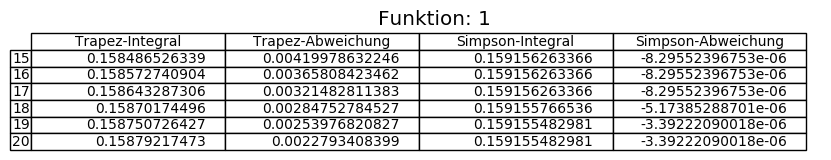

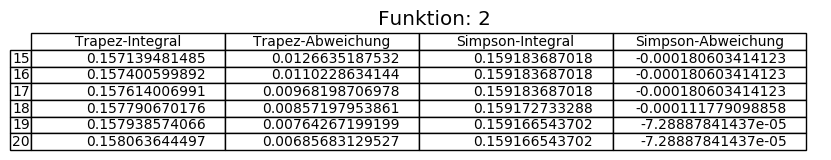

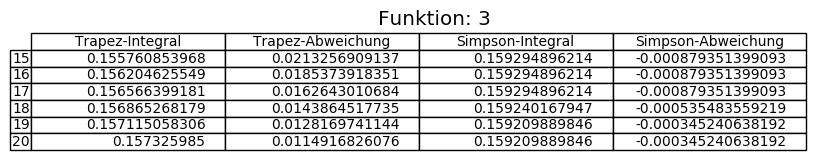

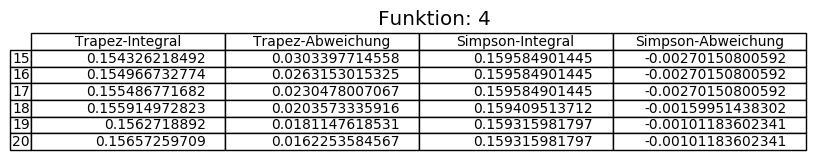

In [14]:
i=0
for g in [f_1,f_2,f_3,f_4]
    function_tbl = rand(6,4)
    for y_resolution in 15:20
        integral_simpson, integral_trapez = 0,0
        
        # definiere die gewuenschte Aufloesung
        y_trapez = linspace(0, π, y_resolution) # Argumente sind start = 0, stop = pi, Anzahl der Schritte = y_resolution
        y_simpson = linspace(0, π, round(y_resolution / 2) + 1)

        # Integrationsschleife fuer Trapezregel
        for (a, b) in zip(y_trapez[1:end - 1], y_trapez[2:end])
            integral_trapez += trapez_element(g,a,b)
        end

        # Integrationsschleife fuer Simpsonregel
        for (a, b) in zip(y_simpson[1:end - 1], y_simpson[2:end])
            integral_simpson += simpson_element(g,a,b)
        end

        # Ausgabe des Ergebnis inklusive Abweichung von erwartetem Ergebnis 1
        function_tbl[Int(y_resolution-14), 1], function_tbl[Int(y_resolution-14), 2], function_tbl[Int(y_resolution-14), 3], function_tbl[Int(y_resolution-14), 4] = integral_trapez, (1.0 - 2 * pi * integral_trapez), integral_simpson, (1.0 - 2 * pi * integral_simpson)

    end
    i+=1
    fig = figure(figsize=(10,1))
    ax=fig[:add_subplot](111)
    ax[:table](cellText=function_tbl, loc="best", rowLabels=15:20, colLabels=["Trapez-Integral", "Trapez-Abweichung", "Simpson-Integral", "Simpson-Abweichung"])
    ax[:xaxis][:set_visible](false)
    ax[:yaxis][:set_visible](false)
    ax[:spines]["top"][:set_visible](false)
    ax[:spines]["left"][:set_visible](false)
    ax[:spines]["bottom"][:set_visible](false)
    ax[:spines]["right"][:set_visible](false)
    title(string("Funktion: ", i))
    
end

println("Je groesser die 2te Ableitung von Null abweicht, desdo ungenauer werden die Integrale")

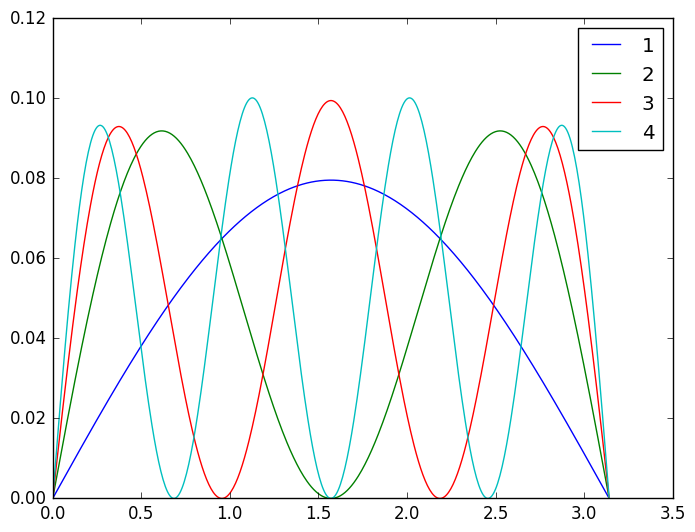

PyObject <matplotlib.legend.Legend object at 0x7f353d020810>

In [4]:
x_values = linspace(0, π, 500)
plot(x_values, f_1(x_values), label="1")
plot(x_values, f_2(x_values), label="2")
plot(x_values, f_3(x_values), label="3")
plot(x_values, f_4(x_values), label="4")
legend()